In [1]:
from pathlib import Path
import shutil
import zipfile
from fastai.vision import *
from fastai import *
from fastai.widgets import *

In [2]:
path = Path("dataset")

In [3]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(do_flip=False, max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.), size=256, num_workers=4).normalize(imagenet_stats)

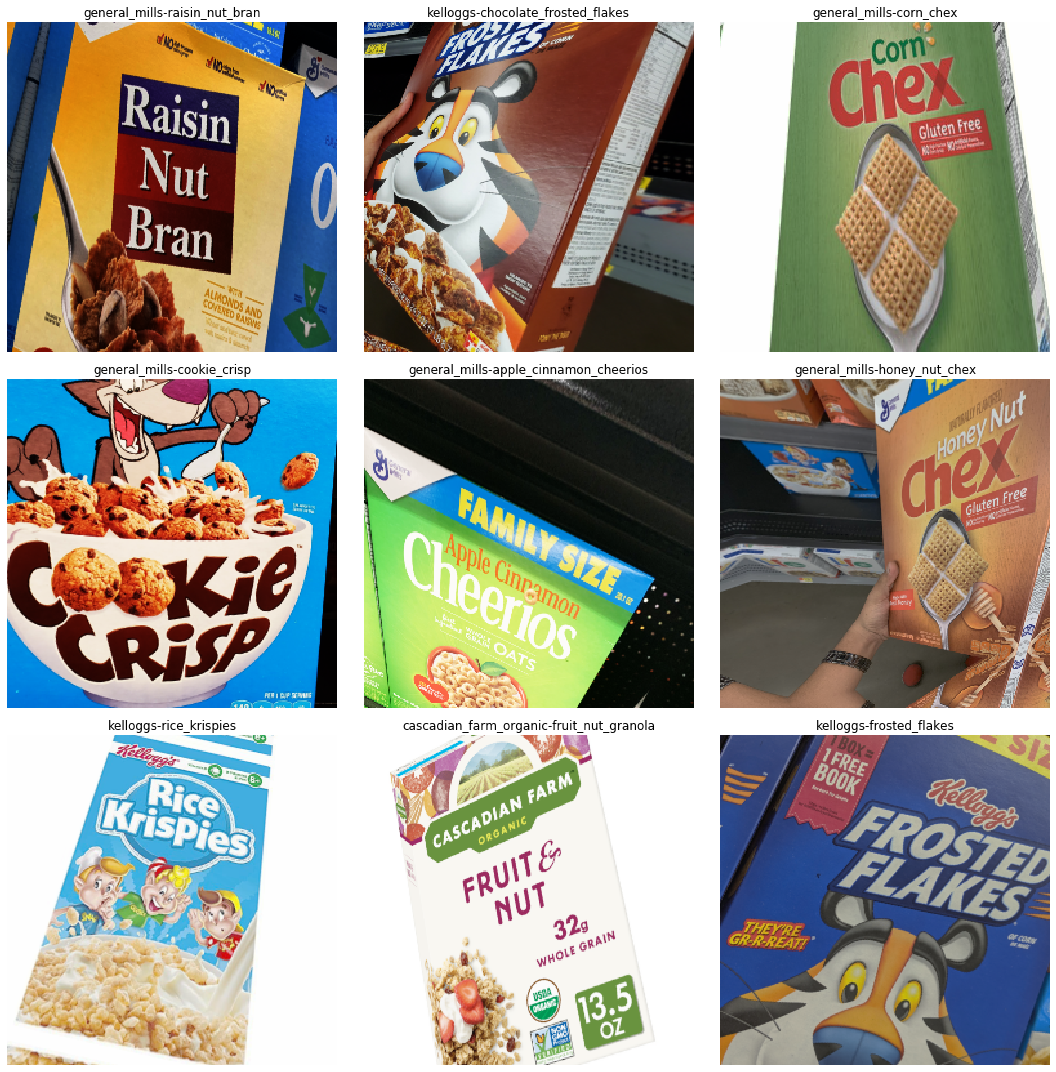

In [4]:
data.show_batch(rows=3, figsize=(15,15))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
# Load Pretrained model to train further
# learn.load("classifier_resnet_34")

Learner(data=ImageDataBunch;

Train: LabelList (849 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cascadian_farm_organic-cinnamon_crunch,cascadian_farm_organic-cinnamon_crunch,cascadian_farm_organic-cinnamon_crunch,cascadian_farm_organic-cinnamon_crunch,cascadian_farm_organic-cinnamon_crunch
Path: dataset;

Valid: LabelList (212 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
post-fruity_pebbles,great_value-raisin_bran,kelloggs-raisin_bran,general_mills-honey_nut_chex,kelloggs-special_k_original
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


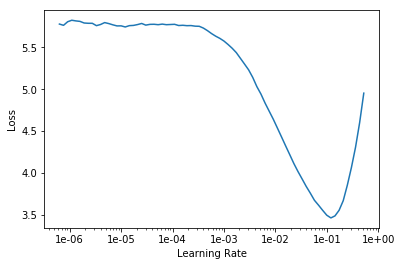

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(4, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,3.977735,1.377267,0.352381,02:21
1,2.146509,0.523213,0.152381,02:22
2,1.377785,0.175026,0.047619,02:20
3,0.979189,0.140102,0.033333,02:20


In [9]:
learn.save("classifier_resnet_34", return_path=True)

PosixPath('dataset/models/classifier_resnet_34.pth')

In [10]:
learn.unfreeze()

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
learn.export("cereal_classifier.pkl")